# What is the weather like as we approach the Equator? 

### Summary and Findings

In order to show that the temperature increases as we approached the equator, I used the website [OpenWeatherMap](https://openweathermap.org/api) to randomly select nine hundred cities across the world based on randomized coordinates. After I got my list of coorindates, I used CityPy to locate closest cities for each coordinate specified since some of the coordinates may be unmarked and pulled the weather data for each of those cities and filtered out cities that did not contain records on OpenWeatherMap.

After collecting the data, I visualized my data using scatterplots that displayed the relationship between *Max Temperature v City Latitude* , *Humidity v City Latitude* , *Cloudiness v City Latitude*, and *Wind Speed v City Latitude*.  

In my visualizations, I found:

+ as we approach the equator, the maximum temperature increases to the high 80's and 90's. Meanwhile, the temperature drops as we move away from zero degrees latitude. As latitude approaches 90, which is the north and south poles, the max temperature drops to around -30 degrees F. Since the sun hits the equator the most, this generates warmer temperatures for cities near the equator relative to cities further from the equator. 


+ windspeed pressure is highest as we approach the north and south poles, and lowest at the equator. Winds are generated by differences in atmospheric pressure and wind speeds move from high-pressure areas to low-pressure areas. The sun tends to warm cities near the equator, and this generates high atmospheric pressure, relative to cities further from the equator. As a result, the winds blow towards lower pressure areas, which is seen with higher windspeeds in cities further from the equator. 


+ humidity increases as we approach the equator. We found that on average, cities near the equator has humidity levels of around 90%. However, the humidity percentages have high variability as we move further from the equator. Since the equator tend to be warmer, this also causes moisture to hold better. As a result, humidity is generally higher for cities near the equator, compared to cities that are further from the equator with cooler climates.

In [1]:
#import dependencies 

import csv
import random
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from citipy import citipy
from pprint import pprint
import seaborn as sns


In [2]:
#building random list of long and lat numbers

latitude=[]
for i in range(900):
    lat=random.uniform(-90,90)
    latitude.append(lat)

longitude=[]
for i in range(900):
    lon=random.uniform(-180,180)
    longitude.append(lon)



In [3]:
#collects all the datas for weather within the range 

weather_response=[]

apikey="1b7791cf6381cbd999ee625077848439"
url="http://api.openweathermap.org/data/2.5/weather?"

def format_query(url,lat,lon,api_key): #figure this out
    ''' creates the query format for the response'''
    return f"{url}lat={lat}&lon={lon}&APPID={api_key}"

api_link=format_query("http://api.openweathermap.org/data/2.5/weather?",latitude[0],longitude[0],apikey)
response_json=requests.get(api_link).json()

for i in range(900):
    api_link=format_query("http://api.openweathermap.org/data/2.5/weather?",latitude[i],longitude[i],apikey)
    response_json=requests.get(api_link).json()
    weather_response.append(response_json)

#pprint(weather_response)




In [5]:
#list of x random cities 

weather_response=[]
cities=[]

apikey="1b7791cf6381cbd999ee625077848439"
url="http://api.openweathermap.org/data/2.5/weather?"

def format_query(url,lat,lon,api_key): #figure this out
    ''' creates the query format for the response'''
    return f"{url}lat={lat}&lon={lon}&APPID={api_key}"

for i in range(900):
    api_link=format_query(url,latitude[i],longitude[i],apikey)
    response_json=requests.get(api_link).json()
    #weather_response.append(response_json)
    city_lat=response_json["coord"]["lat"]
    city_lon=response_json["coord"]["lon"]
    #pprint(f"{city_lat},{city_lon}")
    city=citipy.nearest_city(city_lat,city_lon)
    city_list=city.city_name
    cities.append(city_list)


In [6]:
#now i need to create reformat query with the cities above, and then grab the relative response for them. 

imperial_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial"
apikey

def format_cities(imperial_url,apikey,cities):
    return(f"{imperial_url}&APPID={apikey}&q={cities}")

#create an empty list

cities_dict=[] #list
for i in cities:
    api_link=format_cities(imperial_url,apikey,i)
    print(api_link)
    response_json=requests.get(api_link).json()
    if response_json['cod'] == '404':
        del(i)    
    else:
        cities_dict.append(response_json)
#cities_dict


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hendrina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=trapani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=cikupa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=mushie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=bukachacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=los llanos

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tigzirt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=t

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=khonuu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=santiago de cao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=m

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tignere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=funtua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=namatanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=darnah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=punta arena

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=grand forks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=port blair
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=simao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=pasni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee62507784843

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=los llanos de aridane
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=rio gallegos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=nikolskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=wakkanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd99

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tomatlan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=ulaangom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=nanton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=y

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=vaini
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=marataizes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=saint-jos

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=palabuhanratu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=emba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee62

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=port macquarie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=alihe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=ghanzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=la crosse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=eskasem
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=havoysund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=tarudant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee62

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=mandera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077848439&q=chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1b7791cf6381cbd999ee625077

In [7]:
#test 404 error

# api_link=format_cities(imperial_url,apikey,2)
# api_link
# response_json=requests.get(api_link).json()
# response_json['cod'] == '404'


#test and try

# for data in cities_dict:
#     try:
#         print(data["coord"]["lat"])
#     except (KeyError) as e:
#         print("error")

In [14]:
#put them all into a dataframe

latitude_data=[i.get("coord").get("lat") for i in cities_dict] 
temperature_data=[i.get("main").get("max temp") for i in cities_dict]
humidity_data=[i.get("main").get("humidity") for i in cities_dict]
cloudy_data=[i.get("clouds").get("all") for i in cities_dict]
wind_speed_data=[i.get("wind").get("speed") for i in cities_dict]
city_series=[i.get("name") for i in cities_dict]

In [47]:
#create a dataframe for the series above

weather_df=pd.DataFrame({
    "City":city_series,
    "Latitude":latitude_data,
    "Temperature (F)":temperature_data,
    "Humidity":humidity_data,
    "Cloudy":cloudy_data,
    "Wind Speed":wind_speed_data
})

weather_df[["City","Latitude","Temperature (F)","Humidity","Cloudy","Wind Speed"]].head()

weather_df.to_csv("cityWeather.csv",index=False,header=True)

## Relationship between Temp (F) and Latitude

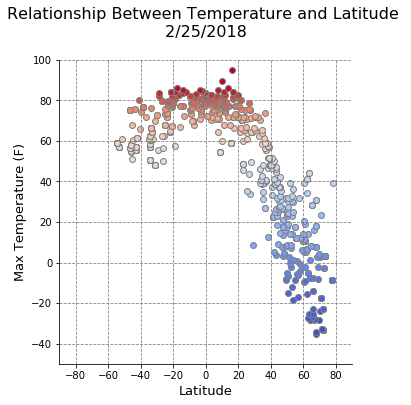

In [18]:
sns.lmplot(x="Latitude",y="Temperature (F)",data=weather_df,
          fit_reg=False,
           palette="coolwarm",
           hue="Temperature (F)",
           legend=False,
           scatter_kws={
               "alpha":1,
               "linewidth":1,
               "edgecolor":"grey"})

plt.xlim(-90,90)
plt.ylim(-50,100)
plt.title("Relationship Between Temperature and Latitude \n 2/25/2018 \n",size=16)
plt.grid(linestyle="--",color="grey")
plt.xlabel("Latitude",size=13)
plt.ylabel("Max Temperature (F)",size=13)

plt.savefig("Temp_Latitude")

## Relationship between Humidity (%) and Latitude

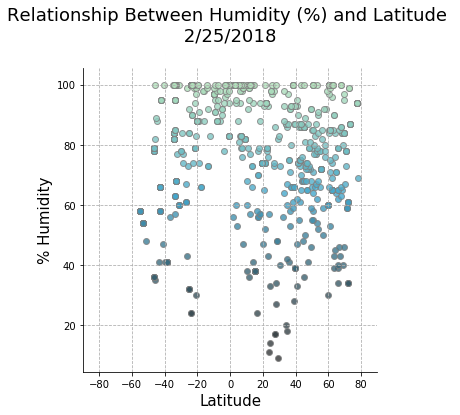

In [19]:
sns.lmplot(x="Latitude",y="Humidity",data=weather_df,
          fit_reg=False,
           palette="GnBu_d",
           hue="Humidity",
           legend=False,
          scatter_kws={
              "linewidth":1,
              "edgecolor":"grey"})
          
plt.xlim(-90,90)
plt.title("Relationship Between Humidity (%) and Latitude \n 2/25/2018 \n",size=18)
plt.xlabel("Latitude",size=15)
plt.ylabel("% Humidity",size=15)
plt.grid(linestyle="dashed")

plt.savefig("Humidity_Latitude")

 ## Cloudiness (%) vs. Latitude

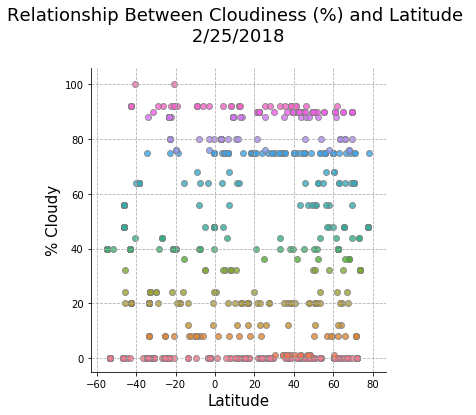

In [20]:
sns.lmplot(x="Latitude",y="Cloudy",data=weather_df,
          fit_reg=False,
           palette="husl",
           hue="Cloudy",
          legend=False,
          scatter_kws={
              "edgecolor":"grey",
              "linewidth":1           
     })

plt.title("Relationship Between Cloudiness (%) and Latitude \n 2/25/2018 \n",size=18)
plt.grid(linestyle="dashed")
plt.xlabel("Latitude",size=15)
plt.ylabel("% Cloudy",size=15)

plt.savefig("Cloudy_Lat")

## Wind Speed (mph) vs. Latitude

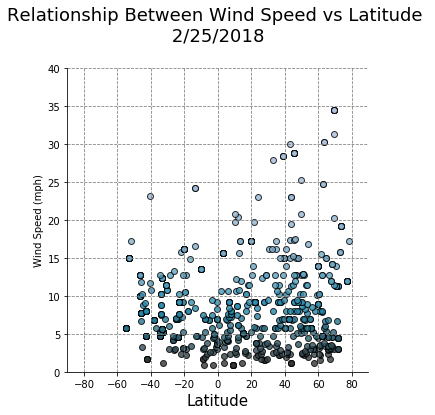

In [21]:
sns.lmplot(x="Latitude",y="Wind Speed", data=weather_df,
          fit_reg=False,
           palette="PuBuGn_d",
           hue="Wind Speed",
           legend=False,
          scatter_kws={
              "edgecolor":"black",
              "linewidth":1,
          })


plt.xlim(-90,90)
plt.ylim(0,40)
plt.title("Relationship Between Wind Speed vs Latitude \n 2/25/2018 \n",size=18)
plt.xlabel("Latitude",size=15)
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle="dashed",color="grey")

plt.savefig("Wind_Latitude")